In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dataset=pd.read_csv("houses_prices.csv")

y=dataset["SalesPrice"]
X=dataset.drop("SalesPrice",axis=1)

X_dataset=X

scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
# Train test split
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


dataset.shape


(2930, 305)

In [5]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
predictions=model_lr.predict(X_train)

print("Train:", r2_score(y_train,predictions))
predictions=model_lr.predict(X_test)

print("Test:", r2_score(y_test,predictions))



Train: 0.938353962458278
Test: -5.922530438400475e+19


In [10]:
model_r=Ridge(alpha=2)
model_r.fit(X_train,y_train)
predictions=model_r.predict(X_train)

print("Train:", r2_score(y_train,predictions))
predictions=model_r.predict(X_test)

print("Test:", r2_score(y_test,predictions))



Train: 0.9251913512103855
Test: 0.880018158216308


RidgeCV

In [7]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

seed=13
kfold=KFold(n_splits=5, shuffle=True,random_state=seed)
model_rcv=RidgeCV(cv=kfold)

model_rcv.fit(X_train,y_train)
predictions=model_rcv.predict(X_train)

print("Train:", r2_score(y_train,predictions))
predictions=model_rcv.predict(X_test)

print("Test:", r2_score(y_test,predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.9060243584752138
Test: 0.8818617113087038
Alpha: 10.0


<b>Lasso</b>

In [13]:
model_l=Lasso(alpha=51)
model_l.fit(X_train,y_train)
predictions=model_l.predict(X_train)

print("Train:", r2_score(y_train,predictions))
predictions=model_l.predict(X_test)

print("Test:", r2_score(y_test,predictions))



Train: 0.9285643720979319
Test: 0.8815487170667549


In [12]:
from sklearn.linear_model import LassoCV

seed=13
kfold=KFold(n_splits=5, shuffle=True,random_state=seed)
model_lcv=LassoCV(cv=kfold)

model_lcv.fit(X_train,y_train)
predictions=model_lcv.predict(X_train)

print("Train:", r2_score(y_train,predictions))
predictions=model_lcv.predict(X_test)

print("Test:", r2_score(y_test,predictions))

print("Alpha:", model_lcv.alpha_)

Train: 0.928377201303416
Test: 0.8816306830317462
Alpha: 51.88722443267619


Visualization

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def plotCoef(model, info=""):
    # Plot the coeffients as bars
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(type(model).__name__ + " " + info, fontsize=16)
    rects = plt.bar(np.arange(len(model.coef_)), model.coef_, color="lightblue")

    plt.gca().set_xticklabels([])
    plt.xticks([])
    plt.yscale('symlog')
    plt.show()

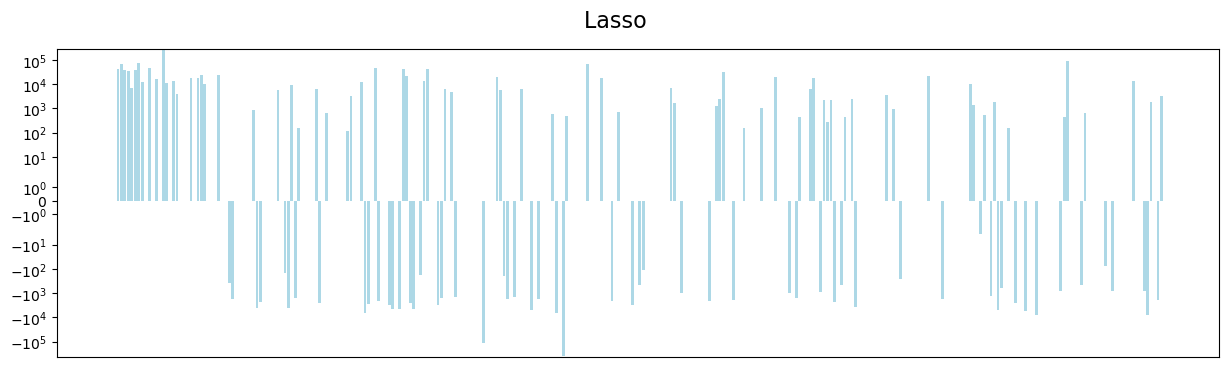

In [15]:
plotCoef(model_l)

Visualise Ridge regression coefficients for different alphas


Train: 0.9304613194261745
Test: 0.877339068766473


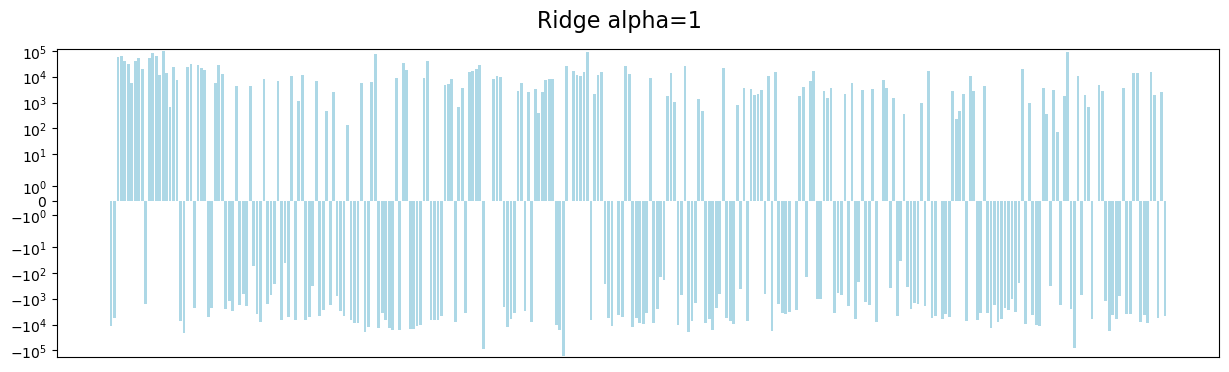

Train: 0.9251913512103855
Test: 0.880018158216308


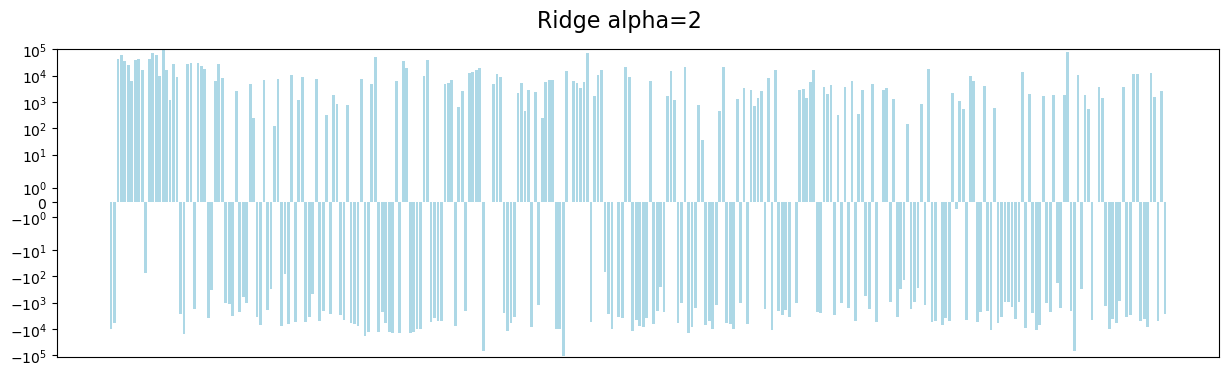

Train: 0.9212584542662589
Test: 0.8814153120684091


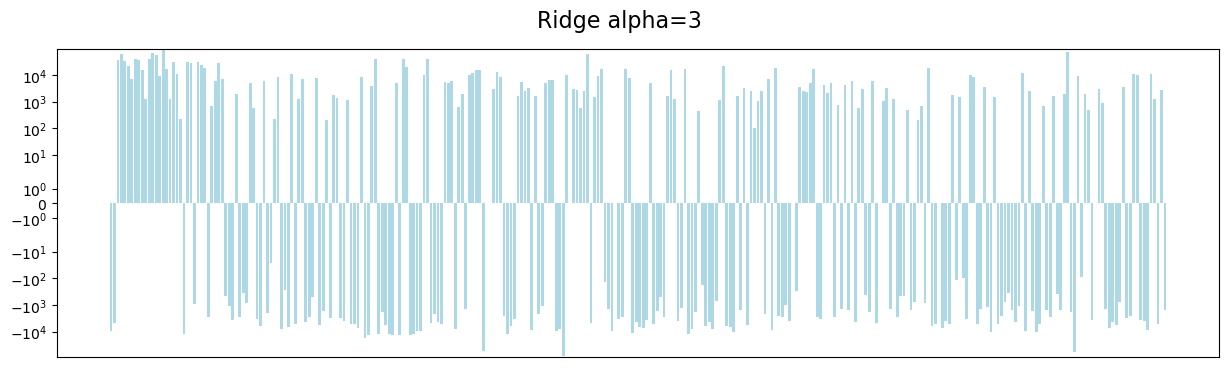

Train: 0.9181020103891121
Test: 0.8821319182233209


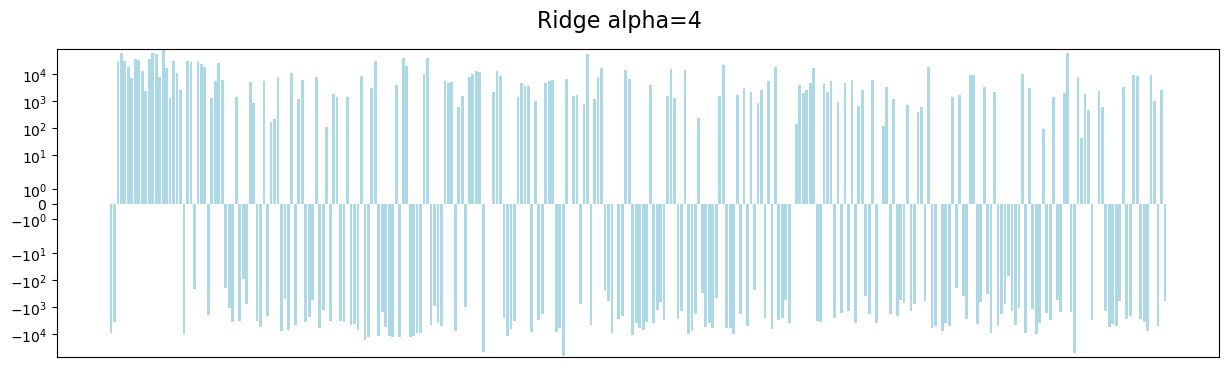

Train: 0.9154534610146456
Test: 0.8824664885288805


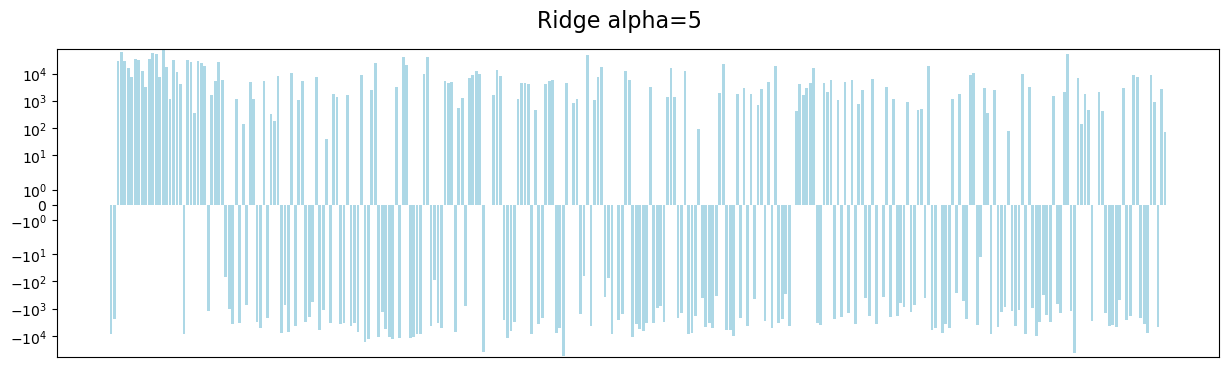

Train: 0.9131589903780857
Test: 0.8825688647270258


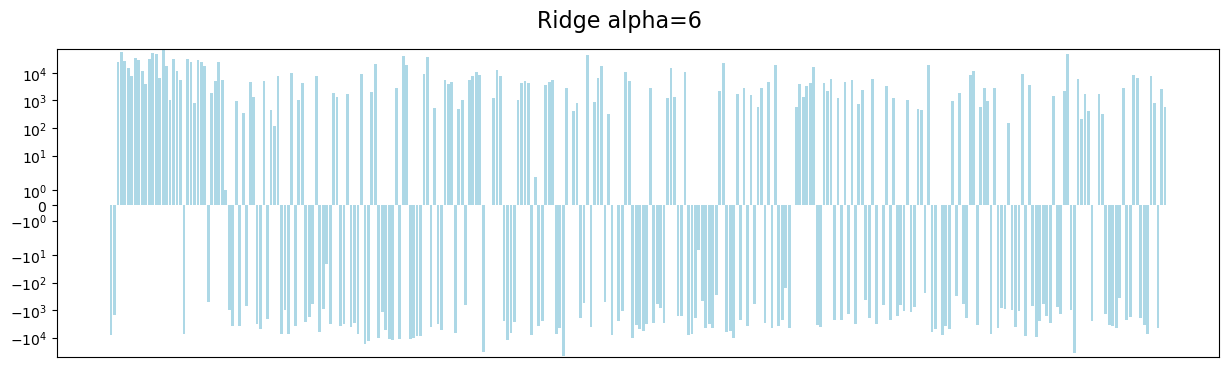

Train: 0.9111227804436782
Test: 0.8825203391748204


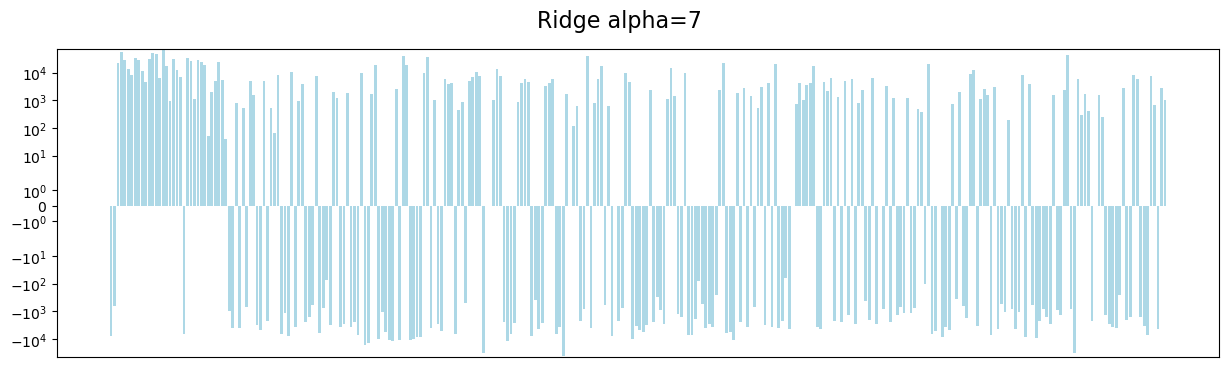

Train: 0.9092817381700808
Test: 0.882368365180277


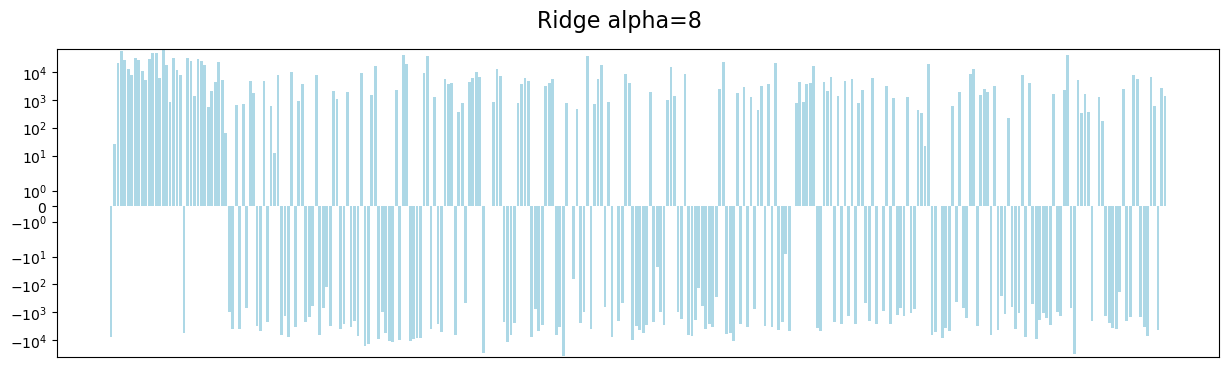

Train: 0.9075925292719165
Test: 0.8821424048635211


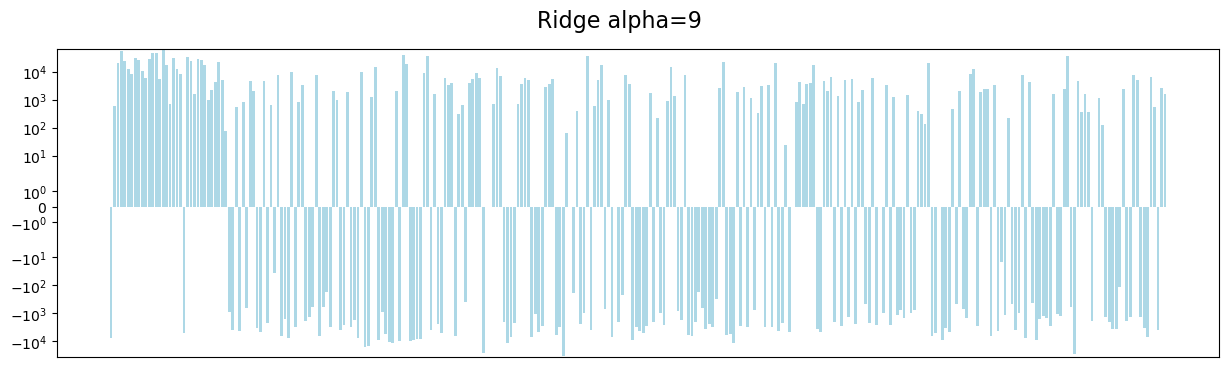

Train: 0.9060243584752138
Test: 0.8818617113087038


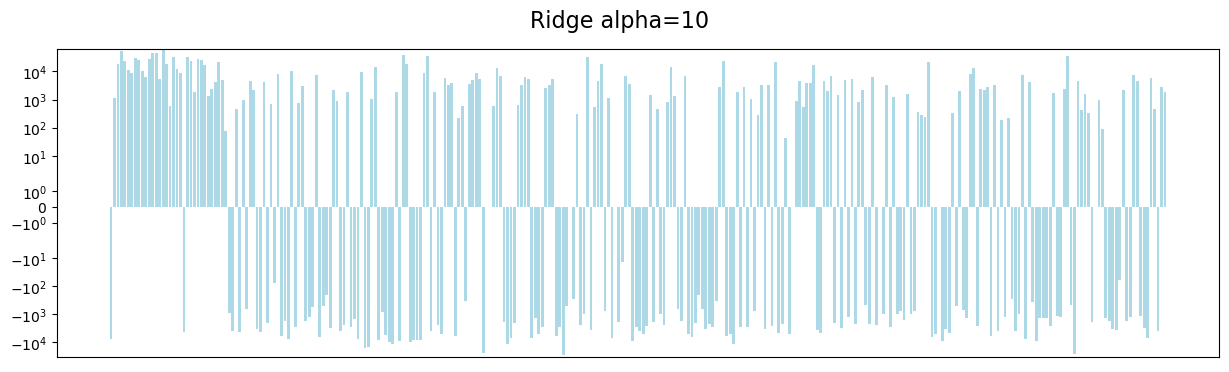

In [17]:
# Visualise Ridge regression coefficients for different alphas
coefs_r = []
for alpha in range(1,11, 1):
    # Create model
    model = Ridge(alpha=alpha)

    #Fit model
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print("Train:", r2_score(y_train, predictions))

    # Evaluate
    predictions = model.predict(X_test)
    print("Test:", r2_score(y_test, predictions))
    
    plotCoef(model, "alpha="+str(alpha))
    coefs_r.append(model.coef_)

# Visualise Lasso regression coefficients for different alphas


Train: 0.9365974795130201
Test: 0.8756094898808343


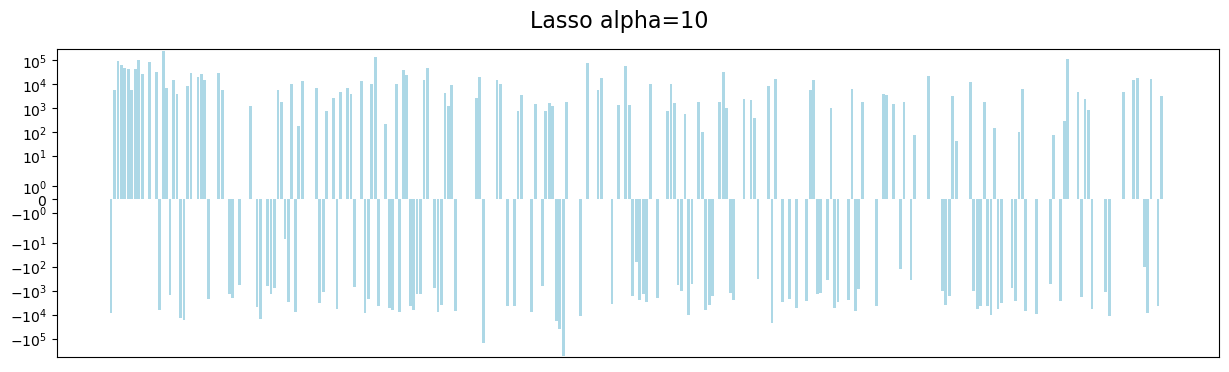

Train: 0.9345921125389752
Test: 0.8780272330919205


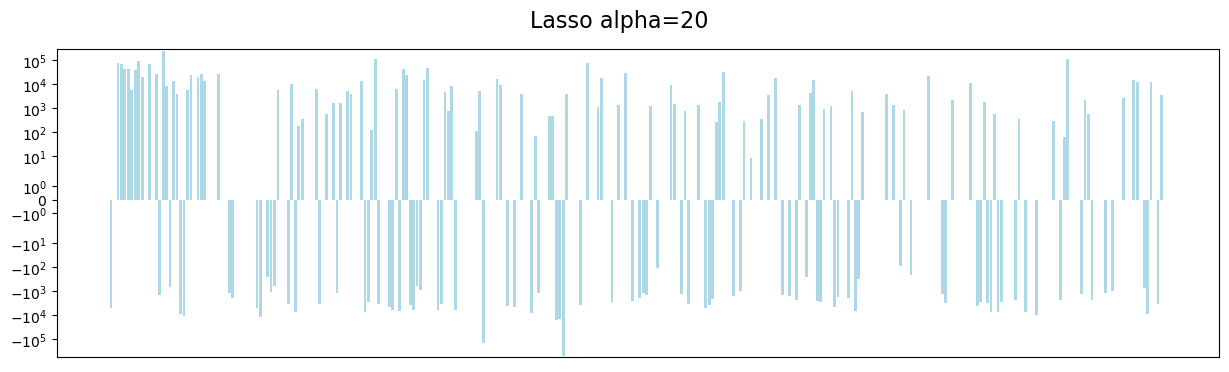

Train: 0.9326538466367105
Test: 0.8793619973172934


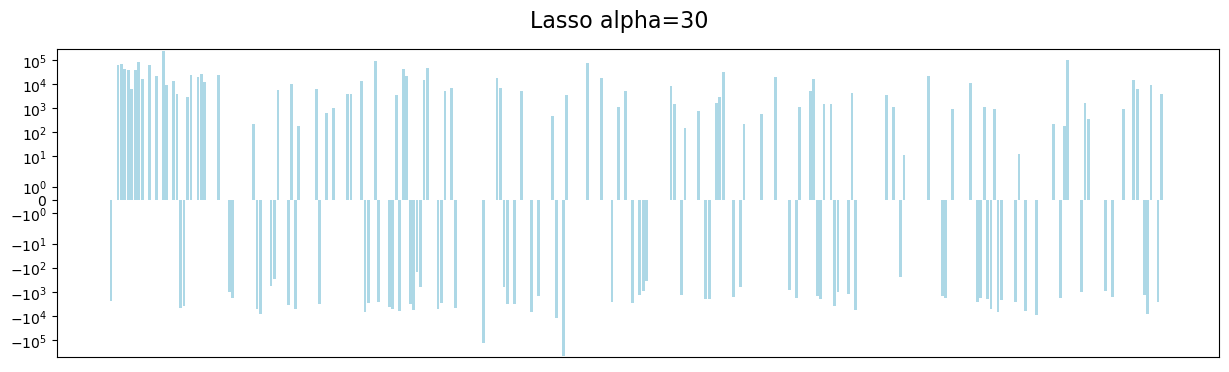

Train: 0.9307410689189914
Test: 0.8805003603058328


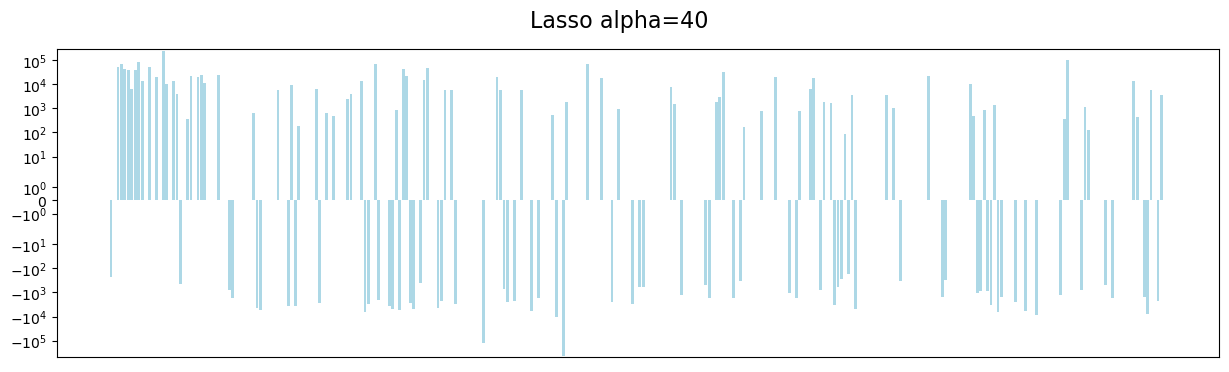

Train: 0.9287734754550877
Test: 0.8814590408259797


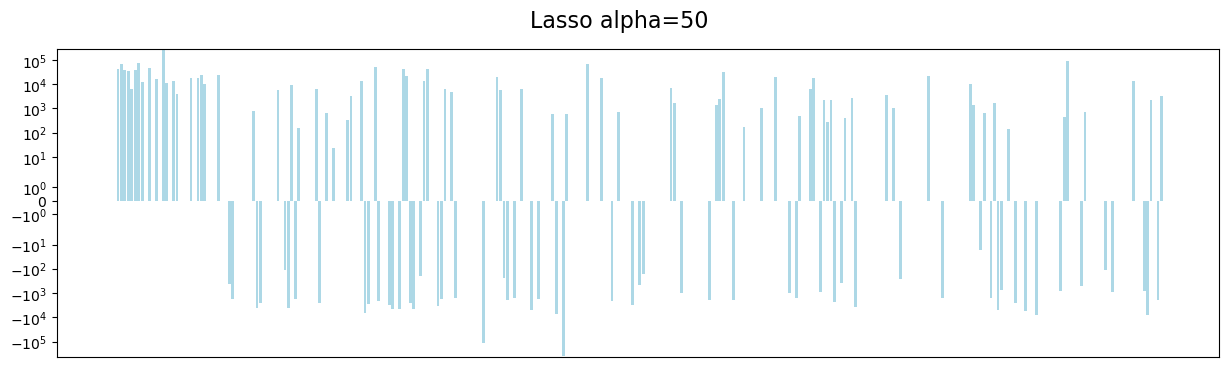

Train: 0.9266003399637421
Test: 0.882257275606496


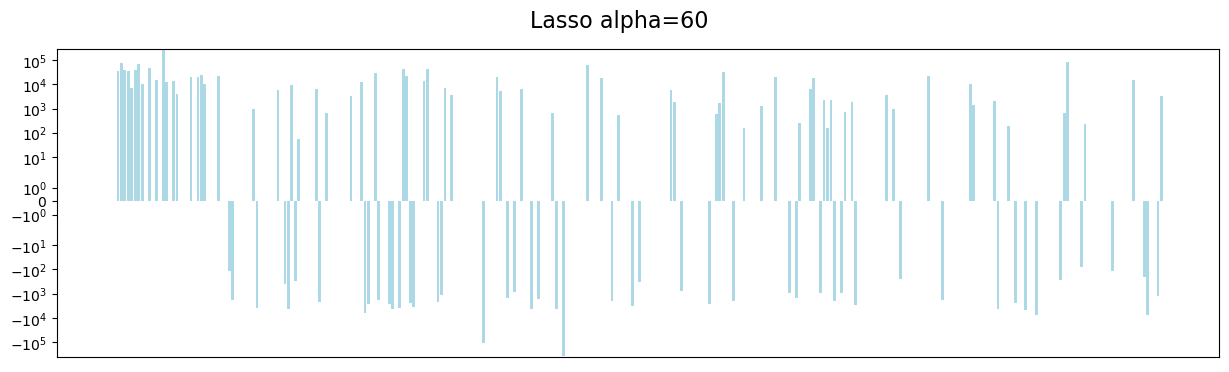

Train: 0.9243850093205814
Test: 0.882810241630722


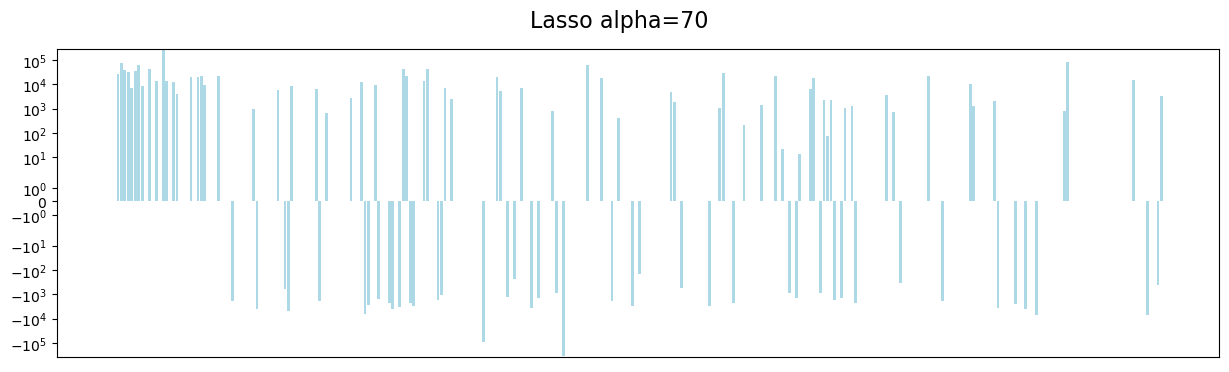

Train: 0.9222224700211966
Test: 0.8833018641834489


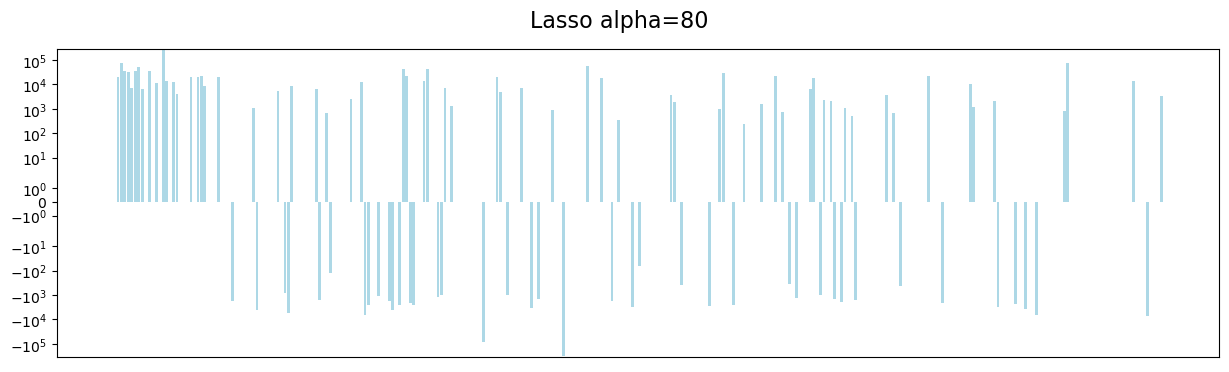

Train: 0.9200556447974929
Test: 0.8838742315788604


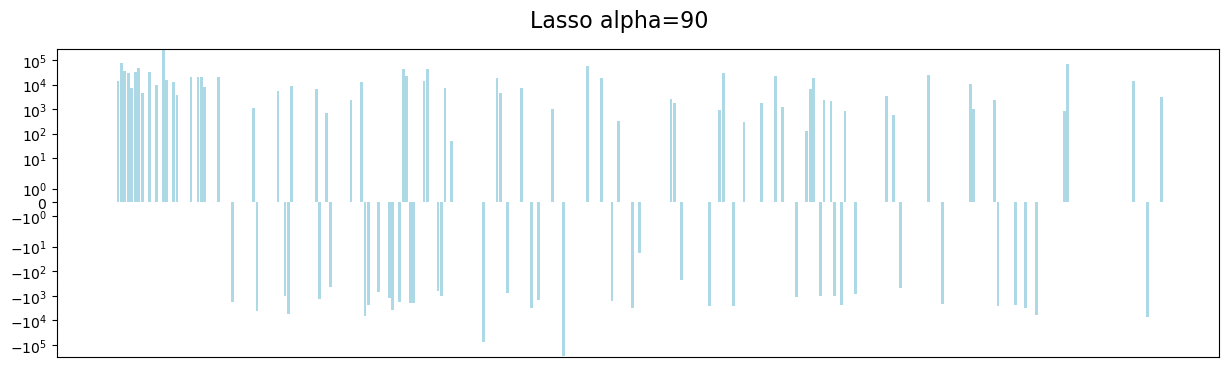

Train: 0.917697473130166
Test: 0.8843424027867363


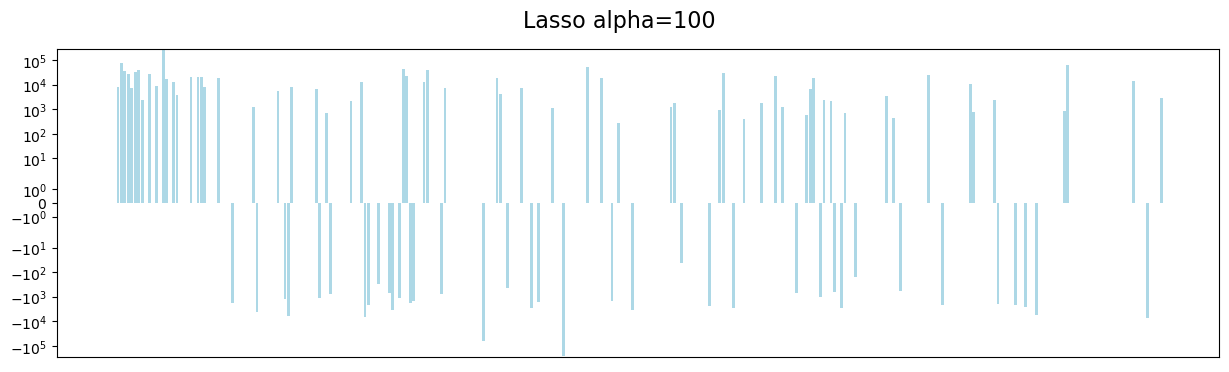

In [18]:
# Visualise Lasso regression coefficients for different alphas
coefs_l = []
for alpha in range(10,110, 10):
    # Create model
    model = Lasso(alpha=alpha)

    #Fit model
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print("Train:", r2_score(y_train, predictions))

    # Evaluate
    predictions = model.predict(X_test)
    print("Test:", r2_score(y_test, predictions))
    
    plotCoef(model, "alpha="+str(alpha))
    coefs_l.append(model.coef_)

In [19]:
np.sum(abs(np.array(coefs_r)), axis=1)

array([3160963.52159406, 2686346.38063229, 2428769.60753909,
       2260153.65292578, 2137842.22709572, 2046157.78915206,
       1971247.46120218, 1908324.73792431, 1855508.54859979,
       1810190.51474467])

In [20]:
np.sum(abs(np.array(coefs_l)), axis=1)

array([2989283.50698202, 2558057.33127559, 2310494.72901756,
       2138163.01693136, 2000615.54366555, 1876478.30912404,
       1769432.81342888, 1678601.09273419, 1598631.10994075,
       1520765.32139805])